In [26]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [27]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):

    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

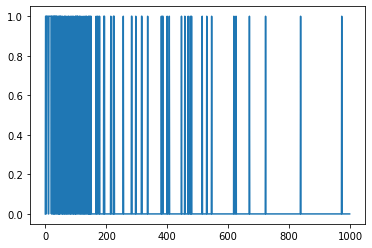

In [28]:
plt.plot(train_data[0])

# 기준 모델

In [29]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [30]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5820 - accuracy: 0.7094 - binary_crossentropy: 0.5820 - val_loss: 0.4341 - val_accuracy: 0.8181 - val_binary_crossentropy: 0.4341
Epoch 2/20
49/49 - 0s - loss: 0.3677 - accuracy: 0.8454 - binary_crossentropy: 0.3677 - val_loss: 0.3437 - val_accuracy: 0.8548 - val_binary_crossentropy: 0.3437
Epoch 3/20
49/49 - 0s - loss: 0.3201 - accuracy: 0.8674 - binary_crossentropy: 0.3201 - val_loss: 0.3390 - val_accuracy: 0.8552 - val_binary_crossentropy: 0.3390
Epoch 4/20
49/49 - 0s - loss: 0.3097 - accuracy: 0.8740 - binary_crossentropy: 0.3097 - val_loss: 0.3290 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3290
Epoch 5/20
49/49 - 0s - loss: 0.3007 - accuracy: 0.8764 - binary_crossentropy: 0.3007 - val_loss: 0.3286 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3286
Epoch 6/20
49/49 - 0s - loss: 0.2949 - accuracy: 0.8795 - binary_crossentropy: 0.2949 - val_loss: 0.3304 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3304
Epoch 7/20
49/49 - 0s - loss

# 작은 모델

In [31]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 4004      
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [32]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6532 - accuracy: 0.6268 - binary_crossentropy: 0.6532 - val_loss: 0.5589 - val_accuracy: 0.7484 - val_binary_crossentropy: 0.5589
Epoch 2/20
49/49 - 0s - loss: 0.4592 - accuracy: 0.7987 - binary_crossentropy: 0.4592 - val_loss: 0.3993 - val_accuracy: 0.8321 - val_binary_crossentropy: 0.3993
Epoch 3/20
49/49 - 0s - loss: 0.3665 - accuracy: 0.8476 - binary_crossentropy: 0.3665 - val_loss: 0.3582 - val_accuracy: 0.8493 - val_binary_crossentropy: 0.3582
Epoch 4/20
49/49 - 0s - loss: 0.3336 - accuracy: 0.8628 - binary_crossentropy: 0.3336 - val_loss: 0.3394 - val_accuracy: 0.8569 - val_binary_crossentropy: 0.3394
Epoch 5/20
49/49 - 0s - loss: 0.3185 - accuracy: 0.8690 - binary_crossentropy: 0.3185 - val_loss: 0.3320 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3320
Epoch 6/20
49/49 - 0s - loss: 0.3101 - accuracy: 0.8731 - binary_crossentropy: 0.3101 - val_loss: 0.3304 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3304
Epoch 7/20
49/49 - 0s - loss

# 큰 모델

In [35]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [36]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4235 - accuracy: 0.8028 - binary_crossentropy: 0.4235 - val_loss: 0.3381 - val_accuracy: 0.8551 - val_binary_crossentropy: 0.3381
Epoch 2/20
49/49 - 0s - loss: 0.2901 - accuracy: 0.8790 - binary_crossentropy: 0.2901 - val_loss: 0.3407 - val_accuracy: 0.8518 - val_binary_crossentropy: 0.3407
Epoch 3/20
49/49 - 0s - loss: 0.2333 - accuracy: 0.9048 - binary_crossentropy: 0.2333 - val_loss: 0.3425 - val_accuracy: 0.8529 - val_binary_crossentropy: 0.3425
Epoch 4/20
49/49 - 0s - loss: 0.1176 - accuracy: 0.9627 - binary_crossentropy: 0.1176 - val_loss: 0.4522 - val_accuracy: 0.8377 - val_binary_crossentropy: 0.4522
Epoch 5/20
49/49 - 0s - loss: 0.0296 - accuracy: 0.9945 - binary_crossentropy: 0.0296 - val_loss: 0.5217 - val_accuracy: 0.8475 - val_binary_crossentropy: 0.5217
Epoch 6/20
49/49 - 0s - loss: 0.0057 - accuracy: 0.9997 - binary_crossentropy: 0.0057 - val_loss: 0.6136 - val_accuracy: 0.8501 - val_binary_crossentropy: 0.6136
Epoch 7/20
49/49 - 0s - loss

# 훈련 손실과 검증 손실 그래프

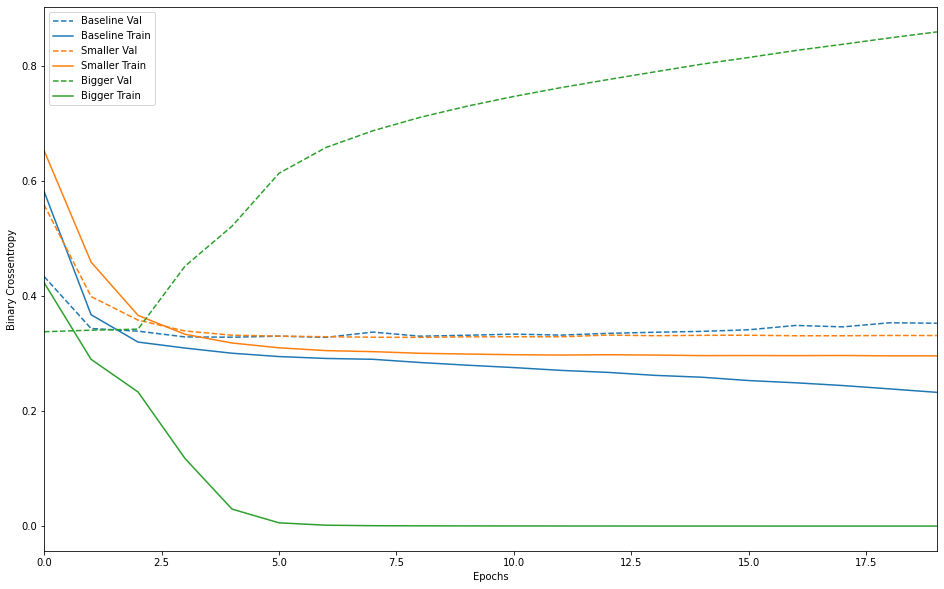

In [37]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                        label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [38]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6286 - accuracy: 0.7164 - binary_crossentropy: 0.5860 - val_loss: 0.4946 - val_accuracy: 0.8141 - val_binary_crossentropy: 0.4541
Epoch 2/20
49/49 - 0s - loss: 0.4199 - accuracy: 0.8425 - binary_crossentropy: 0.3791 - val_loss: 0.3892 - val_accuracy: 0.8530 - val_binary_crossentropy: 0.3485
Epoch 3/20
49/49 - 0s - loss: 0.3641 - accuracy: 0.8657 - binary_crossentropy: 0.3237 - val_loss: 0.3716 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3319
Epoch 4/20
49/49 - 0s - loss: 0.3490 - accuracy: 0.8725 - binary_crossentropy: 0.3099 - val_loss: 0.3653 - val_accuracy: 0.8614 - val_binary_crossentropy: 0.3270
Epoch 5/20
49/49 - 0s - loss: 0.3419 - accuracy: 0.8748 - binary_crossentropy: 0.3042 - val_loss: 0.3646 - val_accuracy: 0.8592 - val_binary_crossentropy: 0.3277
Epoch 6/20
49/49 - 0s - loss: 0.3391 - accuracy: 0.8744 - binary_crossentropy: 0.3027 - val_loss: 0.3614 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3257
Epoch 7/20
49/49 - 0s - loss

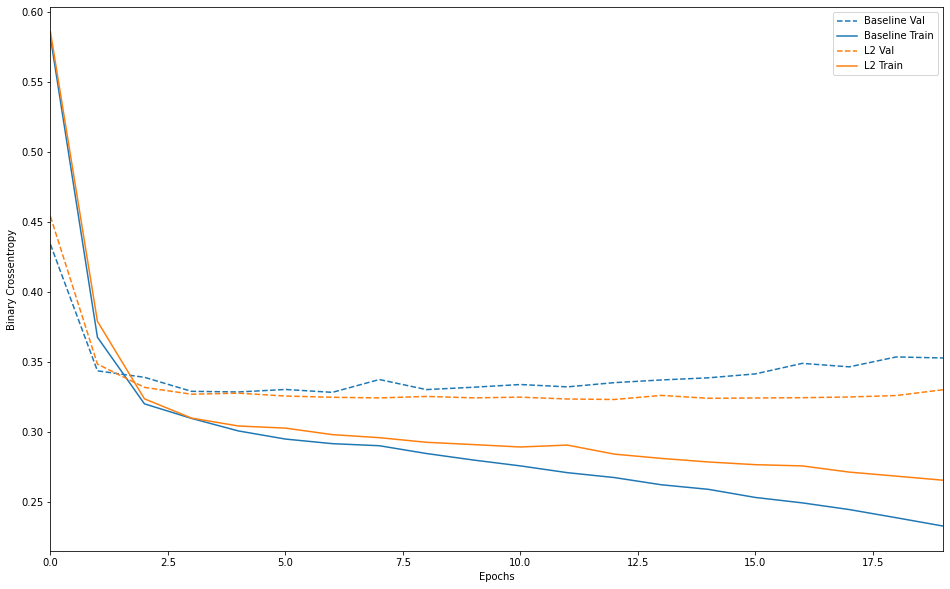

In [39]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [40]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6838 - accuracy: 0.5473 - binary_crossentropy: 0.6838 - val_loss: 0.6374 - val_accuracy: 0.7232 - val_binary_crossentropy: 0.6374
Epoch 2/20
49/49 - 0s - loss: 0.5949 - accuracy: 0.6812 - binary_crossentropy: 0.5949 - val_loss: 0.4637 - val_accuracy: 0.8209 - val_binary_crossentropy: 0.4637
Epoch 3/20
49/49 - 0s - loss: 0.4823 - accuracy: 0.7770 - binary_crossentropy: 0.4823 - val_loss: 0.3768 - val_accuracy: 0.8482 - val_binary_crossentropy: 0.3768
Epoch 4/20
49/49 - 0s - loss: 0.4331 - accuracy: 0.8137 - binary_crossentropy: 0.4331 - val_loss: 0.3490 - val_accuracy: 0.8561 - val_binary_crossentropy: 0.3490
Epoch 5/20
49/49 - 0s - loss: 0.3980 - accuracy: 0.8330 - binary_crossentropy: 0.3980 - val_loss: 0.3343 - val_accuracy: 0.8575 - val_binary_crossentropy: 0.3343
Epoch 6/20
49/49 - 0s - loss: 0.3836 - accuracy: 0.8408 - binary_crossentropy: 0.3836 - val_loss: 0.3278 - val_accuracy: 0.8576 - val_binary_crossentropy: 0.3278
Epoch 7/20
49/49 - 0s - loss

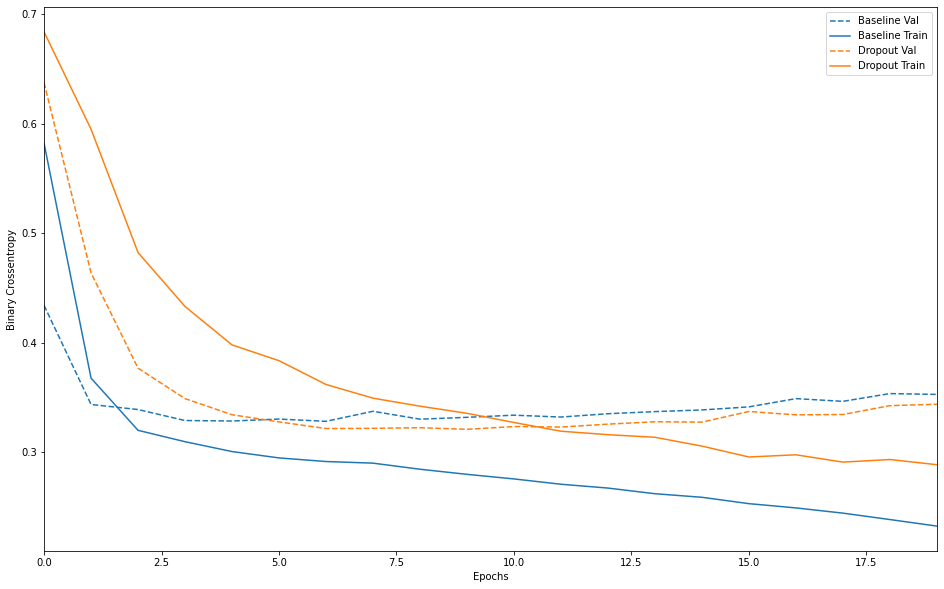

In [41]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])